# Investment Value

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

## Create a DataFrame with the current amount of shares

In [2]:
# Set current amount of shares data
shares_data = {
    "shares": [500, 400]
}

# Set the tickers
tickers = ["AMZN", "GOOG"]

# Create the shares DataFrame
df_shares = pd.DataFrame(shares_data, index=tickers)

# Display shares data
df_shares

,shares
AMZN,500
GOOG,400


In [3]:
# Load .env environment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [6]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [7]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Get current price data for MSFT and AAPL
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Display sample data
df_portfolio

AMZN                                      GOOG  \
                           open     high   low    close   volume     open   
time                                                                        
2020-07-14 00:00:00-04:00  3089  3127.38  2950  3084.02  6842135  1490.31   

                                                              
                              high     low    close   volume  
time                                                          
2020-07-14 00:00:00-04:00  1522.95  1483.5  1520.48  1383833

## Calculate the current value in dollars of the stock portfolio

In [10]:
# Fetch the current closing prices from the DataFrame
amzn_price = float(df_portfolio["AMZN"]["close"])
goog_price = float(df_portfolio["GOOG"]["close"])

print(amzn_price)

3084.02


In [12]:
# Compute the current value in dollars of the stock portfolio
amzn_value = amzn_price * df_shares.loc["AMZN"]["shares"]
goog_value = goog_price * df_shares.loc["GOOG"]["shares"]

# Print the current value of the stocks portfolio
print(f"The current value of the {df_shares.loc['AMZN']['shares']} AMZN shares is ${amzn_value:0.2f}")
print(f"The current value of the {df_shares.loc['GOOG']['shares']} GOOG shares is ${goog_value:0.2f}")

The current value of the 500 AMZN shares is $1542010.00
The current value of the 400 GOOG shares is $608192.00


## Plot stock portfolio composition

### Create a DataFrame with the current value of shares

In [13]:
# Set the data for the shares value DataFrame
value_data = {
    "AMZN": [amzn_value],
    "GOOG": [goog_value]
}

# Create a DataFrame with the current value of shares
df_value = pd.DataFrame(value_data)

# Display DataFrame data
df_value

,AMZN,GOOG
0,1542010.0,608192.0


<AxesSubplot:title={'center':'Stocks Portfolio Composition'}, ylabel='shares'>

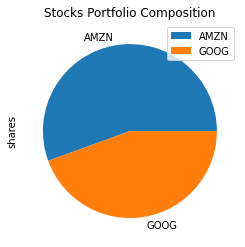

In [14]:
# Create a pie chart to show the proportion of stocks in the portfolio
df_shares.plot.pie(y="shares", title="Stocks Portfolio Composition")

<AxesSubplot:title={'center':'Current Value in Dollars of Stock Portfolio'}>

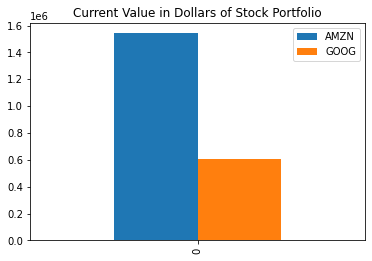

In [15]:
# Create a bar plot to show the value of shares
df_value.plot.bar(title="Current Value in Dollars of Stock Portfolio")